# How to Perform Face Detection with Deep Learning in Keras
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

## Face Detection With OpenCV

In [1]:
from PIL import Image
import cv2
print(cv2.__version__)
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle

4.1.0


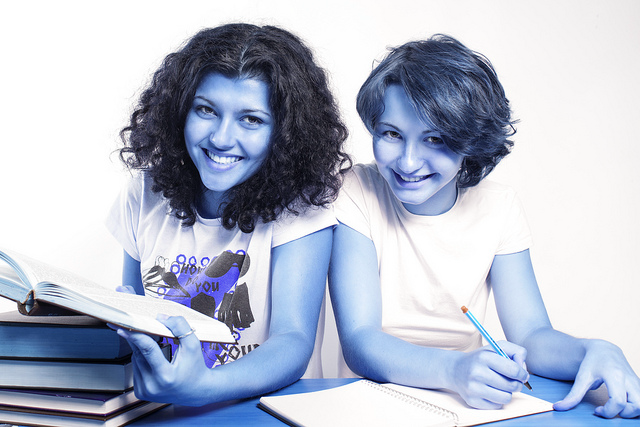

In [2]:
# load the photograph
pixels = imread('test1.jpg')
Image.fromarray(pixels)

In [3]:
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
    print(box)

[174  75 107 107]
[360 102 101 101]


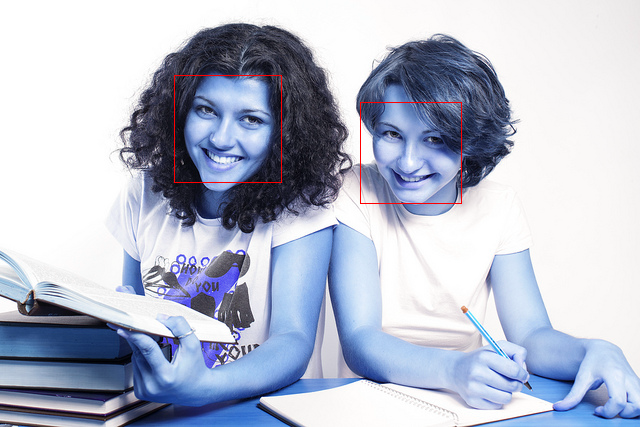

In [5]:
for box in bboxes:
    x, y, width, height = box
    x2, y2 = x + width, y + height
    rectangle(pixels, (x, y), (x2, y2), (255, 0, 0), 1)
Image.fromarray(pixels)

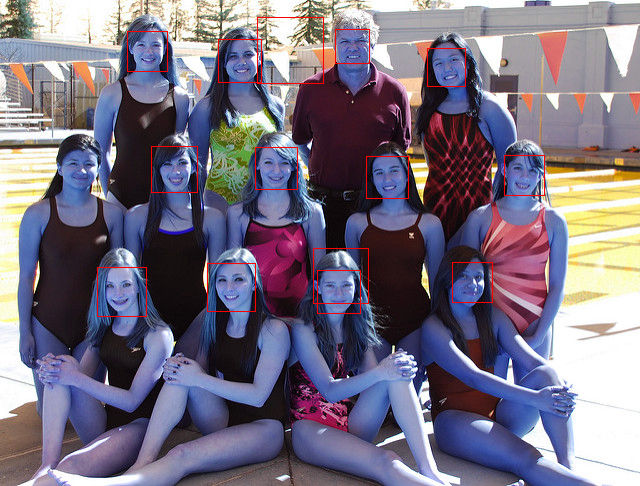

In [6]:
pixels = imread('test2.jpg')
bboxes = classifier.detectMultiScale(pixels)
for box in bboxes:
    x, y, width, height = box
    x2, y2 = x + width, y + height
    rectangle(pixels, (x, y), (x2, y2), (255, 0, 0), 1)
Image.fromarray(pixels)

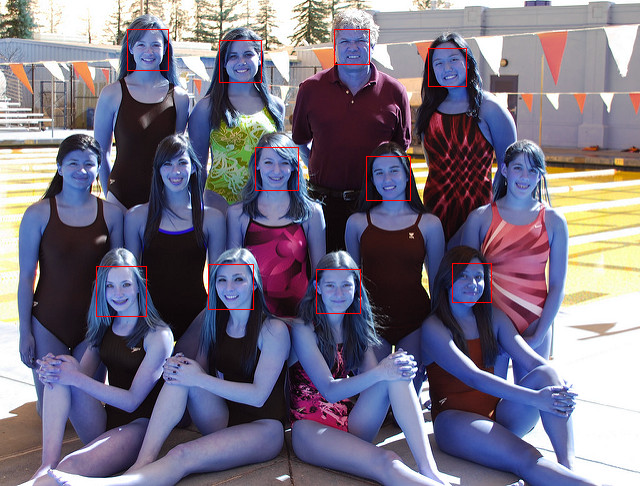

In [13]:
pixels = imread('test2.jpg')
bboxes = classifier.detectMultiScale(pixels, 1.05, 8)
for box in bboxes:
    x, y, width, height = box
    x2, y2 = x + width, y + height
    rectangle(pixels, (x, y), (x2, y2), (255, 0, 0), 1)
Image.fromarray(pixels)

## Face Detection With Deep Learning

In [29]:
import mtcnn
print(mtcnn.__version__)
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

0.0.9


In [17]:
pixels = plt.imread('test1.jpg')

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}
{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


In [31]:
def draw_image_with_boxes(img_data, result_list, faces=True, key_points=False):
    plt.imshow(img_data)
    ax = plt.gca()
    for result in result_list:
        if faces:
            x, y, width, height = result['box']
            rect = Rectangle((x, y), width, height, fill=False, color='red')
            ax.add_patch(rect)
        if key_points:
            for key, value in result['keypoints'].items():
                dot = Circle(value, radius=2, color='red')
                ax.add_patch(dot)
    plt.show()

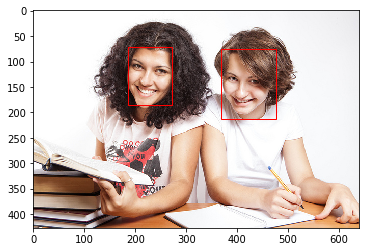

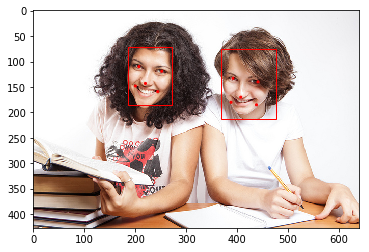

In [33]:
draw_image_with_boxes(pixels, faces)
draw_image_with_boxes(pixels, faces, True, True)

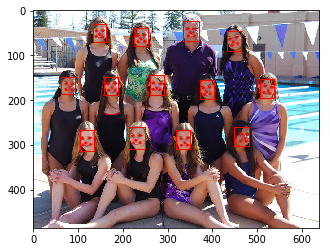

In [34]:
pixels = plt.imread('test2.jpg')
faces = detector.detect_faces(pixels)
draw_image_with_boxes(pixels, faces, True, True)

In [37]:
def draw_faces(pixels, result_list):
    for i, _ in enumerate(result_list):
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        plt.subplot(1, len(result_list), i + 1)
        plt.axis('off')
        plt.imshow(pixels[y1:y2, x1:x2])

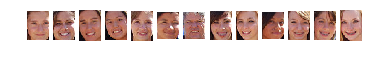

In [38]:
draw_faces(pixels, faces)